<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/CNN_for_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Dropout,Flatten
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train.shape 

(60000, 28, 28)

In [ ]:
x_train, x_test = x_train/255.0 , x_test/255.0

In [ ]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
K = len(set(y_train))
K

10

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)
model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5153 - accuracy: 0.8083 - val_loss: 0.3852 - val_accuracy: 0.8546
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3557 - accuracy: 0.8665 - val_loss: 0.3470 - val_accuracy: 0.8621
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3052 - accuracy: 0.8870 - val_loss: 0.3093 - val_accuracy: 0.8850
Epoch 4/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2723 - accuracy: 0.8984 - val_loss: 0.3031 - val_accuracy: 0.8884
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2495 - accuracy: 0.9064 - val_loss: 0.3015 - val_accuracy: 0.8913
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2286 - accuracy: 0.9142 - val_loss: 0.3084 - val_accuracy: 0.8940
Epoch 7/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2108 - accuracy: 0.9197 - val_loss: 0.3013 -

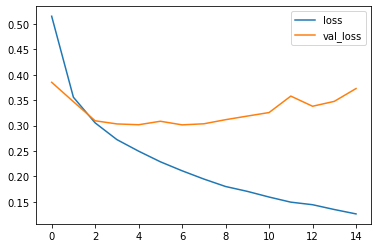

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

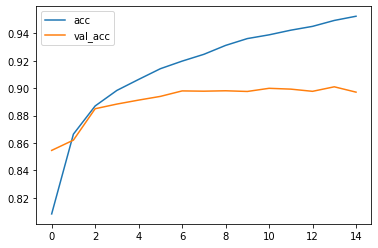

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend() 

Confusion matrix, without normalization
[[810   4  20  13   8   1 137   0   7   0]
 [  0 977   0  11   4   0   6   0   2   0]
 [ 15   0 793  10  66   0 112   0   4   0]
 [ 10   9  21 881  42   1  35   0   1   0]
 [  0   1  50  16 853   0  78   0   2   0]
 [  0   0   0   0   0 972   0  20   0   8]
 [ 63   1  43  18  85   0 781   0   9   0]
 [  0   0   0   0   0  11   0 974   0  15]
 [  1   2   2   1   5   3   3   2 979   2]
 [  1   0   0   0   0   9   0  39   0 951]]


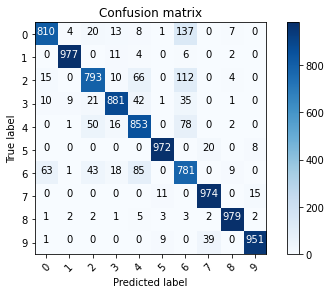

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

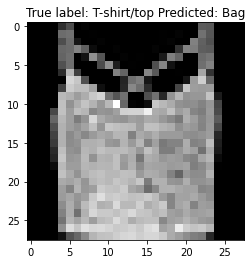

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));